In [1]:
import numpy as np

import os

from os import listdir
from PIL import Image
from os.path import isdir
from matplotlib import pyplot
from numpy import load
from numpy import savez_compressed
from numpy import asarray
from numpy import expand_dims


import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN


from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers import Input

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle


In [149]:
import os
import cv2
from mtcnn import MTCNN

def detect_faces_in_folder(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Initialize the MTCNN detector
    detector = MTCNN()
    
    # Iterate over the files in the input folder
    for filename in os.listdir(input_folder):
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # Construct the full path to the image
            image_path = os.path.join(input_folder, filename)
            # Load the image
            image = cv2.imread(image_path)
            # Detect faces in the image
            faces = detector.detect_faces(image)
            
            # Iterate over the detected faces
            for face in faces:
                x, y, width, height = face['box']
                # Crop the face region from the image
                face_image = image[y:y+height, x:x+width]
                # Generate a filename for the face image
                face_filename = f"face_{x}_{y}_{filename}"
                # Save the face image
                cv2.imwrite(os.path.join(output_folder, face_filename), face_image)
                print(f"Face saved as {face_filename}")

# Path to the input folder containing images
input_folder = "Dataset/senyum/"
# Path to the output folder to save the face images
output_folder = "Dataset/senyum1/"
# Detect and save faces in the input folder
detect_faces_in_folder(input_folder, output_folder)


Face saved as face_11_0_rgb_test_0238.jpg
Face saved as face_9_0_rgb_test_0241.jpg
Face saved as face_10_5_rgb_test_0245.jpg
Face saved as face_6_5_rgb_test_0252.jpg
Face saved as face_11_1_rgb_test_0271.jpg
Face saved as face_1_0_rgb_test_0277.jpg
Face saved as face_5_0_rgb_test_0292.jpg
Face saved as face_4_2_rgb_test_0293.jpg
Face saved as face_10_0_rgb_test_0307.jpg
Face saved as face_4_6_rgb_test_0326.jpg
Face saved as face_0_0_rgb_test_0331.jpg
Face saved as face_3_0_rgb_test_0354.jpg
Face saved as face_14_0_rgb_test_0372.jpg
Face saved as face_7_0_rgb_test_0375.jpg
Face saved as face_5_0_rgb_test_0400.jpg
Face saved as face_11_3_rgb_test_0406.jpg
Face saved as face_17_0_rgb_test_0414.jpg
Face saved as face_6_0_rgb_test_0415.jpg
Face saved as face_2_0_rgb_test_0416.jpg
Face saved as face_8_1_rgb_test_0418.jpg
Face saved as face_12_3_rgb_test_0421.jpg
Face saved as face_4_0_rgb_test_0426.jpg
Face saved as face_9_0_rgb_test_0427.jpg
Face saved as face_13_3_rgb_test_0450.jpg
Face sa

In [99]:
import os

folder_path = 'baroakh4/validation/senyum'  # Ganti dengan path folder yang berisi file yang ingin diubah

# Mengambil daftar file dalam folder
file_list = os.listdir(folder_path)

# Mengurutkan file berdasarkan nama
sorted_files = sorted(file_list)

# Mengubah nama file menjadi bilangan angka yang berurutan
for i, file_name in enumerate(sorted_files):
    file_extension = os.path.splitext(file_name)[1]  # Mendapatkan ekstensi file
    new_file_name = str(i + 1) + file_extension  # Membuat nama baru dengan bilangan angka yang berurutan
    os.rename(os.path.join(folder_path, file_name), os.path.join(folder_path, new_file_name))


In [55]:
import os
import random
import shutil

folder_path = 'testing150/marah/'  # Ganti dengan path folder yang berisi file

# Mengambil daftar file dalam folder
file_list = os.listdir(folder_path)

# Mengambil 100 file secara acak
random_files = random.sample(file_list, 100)

# Membuat folder baru untuk menyimpan file yang dipilih secara acak
output_folder = 'testing100/marah/'  # Ganti dengan path folder tujuan
os.makedirs(output_folder, exist_ok=True)

# Menyalin file yang dipilih secara acak ke folder tujuan
for file_name in random_files:
    file_path = os.path.join(folder_path, file_name)
    output_path = os.path.join(output_folder, file_name)
    shutil.copyfile(file_path, output_path)

print("Berhasil mengambil 100 file secara acak.")


Berhasil mengambil 100 file secara acak.


In [3]:
face_detector = MTCNN()
MyFaceNet =load_model('facenet_keras.h5')

In [4]:
def create_signature(directory):
    signatures = list()
    
    for filename in listdir(directory):
        img_path = os.path.join(directory, filename)
        gbr1 = cv2.imread(img_path)
        
        wajah = face_detector.detect_faces(gbr1)
        
        if len(wajah)>0:
             for face1 in wajah:
                x1, y1, width, height = face1['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height


                # Extract facial landmarks
                facial_landmarks = face1['keypoints']
                left_eye = facial_landmarks['left_eye']
                right_eye = facial_landmarks['right_eye']
                nose = facial_landmarks['nose']
                mouth_left = facial_landmarks['mouth_left']
                mouth_right = facial_landmarks['mouth_right']

                # Draw facial landmarks on the image
                cv2.circle(gbr1, left_eye, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, right_eye, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, nose, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, mouth_left, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, mouth_right, 5, (0, 0, 255), -1)


                # crop and resize the face
                gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
                gbr = Image.fromarray(gbr)
                gbr_array = asarray(gbr)

                face = gbr_array[y1:y2, x1:x2]
                face = Image.fromarray(face)
                face = face.resize((160,160))
                face = asarray(face)

                face = face.astype('float32')
                mean, std = face.mean(), face.std()
                face = (face - mean) /std

                face = expand_dims(face, axis=0)
                signature = MyFaceNet.predict(face)

                signatures.append(signature)
        
    return signatures


In [5]:
def load_dataset(directory):
    X,y = list(), list()
    
    for subdir in listdir(directory):
        path = directory + subdir + '/'
        
        if not isdir(path):
            continue
            
        signatures = create_signature(path)
        labels = [subdir for _ in range(len(signatures))]
        
        X.extend(signatures)
        y.extend(labels)
        
    return asarray(X), asarray(y)

In [19]:
# load test dataset
testX, testy = load_dataset('testing25/')
print(testX.shape, testy.shape)

(75, 1, 128) (75,)


In [20]:
testX

array([[[ 1.3289794 ,  0.3894389 , -1.0831945 , ..., -2.3190756 ,
          1.5299367 , -1.6613424 ]],

       [[ 0.9280424 ,  0.09600329, -0.3198977 , ..., -0.99372506,
          2.0029805 , -1.2824143 ]],

       [[ 0.12290678,  0.63908577, -0.7300171 , ..., -1.8213571 ,
          0.34832552, -0.44151196]],

       ...,

       [[ 1.2903402 ,  0.33000416, -1.134806  , ..., -0.22575565,
          0.6854977 ,  1.0954952 ]],

       [[ 0.9696547 , -0.6626091 , -0.15445891, ..., -1.9177431 ,
          0.2039394 , -0.12066257]],

       [[ 0.0753212 , -0.49434024,  0.25191525, ..., -0.86827576,
          1.0623927 ,  1.4574    ]]], dtype=float32)

In [21]:
testy

array(['marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'marah', 'marah', 'marah',
       'marah', 'marah', 'marah', 'marah', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'senyum', 'senyum',
       'senyum', 'senyum', 'senyum', 'senyum', 'senyum', 'senyum',
       'senyum', 'senyum', 'senyum', 'senyum', 'senyum', 'senyum',
       'senyum', 'senyum', 'senyum', 'senyum', 'senyum', 'senyum',
       'senyum', 'senyum', 'senyum', 'senyum', 'senyum'], dtype='<U6')

In [22]:
testX=np.squeeze(testX, axis=1)

In [23]:
encoder = LabelEncoder()
encoder.fit(testy)
encoded_Y = encoder.transform(testy)

test_y = np_utils.to_categorical(encoded_Y)

In [24]:
test_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [25]:
labels=['normal', 'marah', 'senyum']


modelSmile = load_model('MODEL_BARU4.h5')


In [26]:
#prediksi semua kelas
y_pred = modelSmile.predict(testX)

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

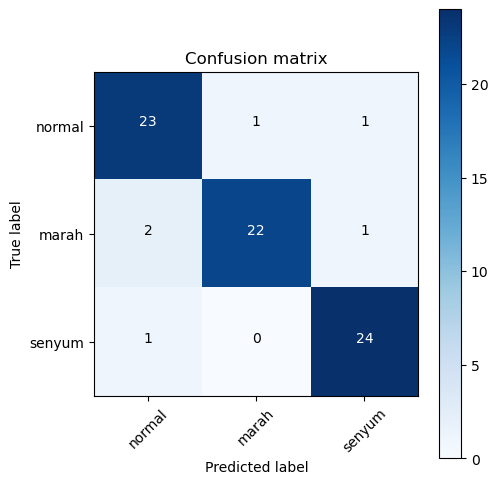

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1),labels=np.arange(len(labels)))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix,classes=labels,normalize=False,
                      title='Confusion matrix')

In [29]:
print('hasil')
print(classification_report(test_y.argmax(axis=1),y_pred.argmax(axis=1),target_names=labels))

hasil
              precision    recall  f1-score   support

      normal       0.88      0.92      0.90        25
       marah       0.96      0.88      0.92        25
      senyum       0.92      0.96      0.94        25

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [1]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report



def Start_Mulai():
    import numpy as np

    import os

    from os import listdir
    from PIL import Image
    from os.path import isdir
    from matplotlib import pyplot
    from numpy import load
    from numpy import savez_compressed
    from numpy import asarray
    from numpy import expand_dims


    import matplotlib.pyplot as plt
    from mtcnn.mtcnn import MTCNN


    from keras.utils import np_utils
    from sklearn.preprocessing import LabelEncoder

    from tensorflow import keras
    from tensorflow.keras import layers
    from keras.models import Model
    from keras.models import load_model
    from keras.layers import Input

    import cv2

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    import itertools
    from keras.models import Sequential, Model
    from keras.layers import Dense, Activation, Input

    from keras.utils import to_categorical
    from keras.preprocessing.image import ImageDataGenerator
    import pickle


    #Load model
    face_detector = MTCNN()
    MyFaceNet =load_model('facenet_keras.h5')

    def create_signature(directory):
        signatures = list()
    
        for filename in listdir(directory):
            img_path = os.path.join(directory, filename)
            gbr1 = cv2.imread(img_path)

            wajah = face_detector.detect_faces(gbr1)

            if len(wajah)>0:
                 for face1 in wajah:
                    x1, y1, width, height = face1['box']
                    x1, y1 = abs(x1), abs(y1)
                    x2, y2 = x1 + width, y1 + height


                    # Extract facial landmarks
                    facial_landmarks = face1['keypoints']
                    left_eye = facial_landmarks['left_eye']
                    right_eye = facial_landmarks['right_eye']
                    nose = facial_landmarks['nose']
                    mouth_left = facial_landmarks['mouth_left']
                    mouth_right = facial_landmarks['mouth_right']

                    # Draw facial landmarks on the image
                    cv2.circle(gbr1, left_eye, 5, (0, 0, 255), -1)
                    cv2.circle(gbr1, right_eye, 5, (0, 0, 255), -1)
                    cv2.circle(gbr1, nose, 5, (0, 0, 255), -1)
                    cv2.circle(gbr1, mouth_left, 5, (0, 0, 255), -1)
                    cv2.circle(gbr1, mouth_right, 5, (0, 0, 255), -1)


                    # crop and resize the face
                    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
                    gbr = Image.fromarray(gbr)
                    gbr_array = asarray(gbr)

                    face = gbr_array[y1:y2, x1:x2]
                    face = Image.fromarray(face)
                    face = face.resize((160,160))
                    face = asarray(face)

                    face = face.astype('float32')
                    mean, std = face.mean(), face.std()
                    face = (face - mean) /std

                    face = expand_dims(face, axis=0)
                    signature = MyFaceNet.predict(face)

                    signatures.append(signature)

        return signatures
    
    def load_data ():
    
        def load_dataset(directory):
            X,y = list(), list()

            for subdir in listdir(directory):
                path = directory + subdir + '/'

                if not isdir(path):
                    continue

                signatures = create_signature(path)
                labels = [subdir for _ in range(len(signatures))]

                X.extend(signatures)
                y.extend(labels)

            return asarray(X), asarray(y) 

  
    
def load_test_data50 ():
    # load test dataset   
    testX, testy = load_dataset('testing50/')
    print(testX.shape, testy.shape)

    # membuat data menjadi one-hot matrix
    testX=np.squeeze(testX, axis=1)

    encoder = LabelEncoder()
    encoder.fit(testy)
    encoded_Y = encoder.transform(testy)

    test_y = np_utils.to_categorical(encoded_Y)


def load_model():

    labels=['marah', 'normal', 'senyum']

    modelSmile = load_model('antusias7.h5')

    #prediksi semua kelas
    y_pred = model.predict(testX)

    test_y.argmax(axis=1)[0] # get actual/target class


def klasifikasi():

    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        plt.figure(figsize=(5, 5))

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

    
def hasil ():    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
    np.set_printoptions(precision=2)


    # Plot non-normalized confusion matrix
    plot_confusion_matrix(cnf_matrix,classes=labels,normalize=False,
                          title='Confusion matrix')

    print('hasil')
    print(classification_report(test_y.argmax(axis=1),y_pred.argmax(axis=1),target_names=labels))

# Global variables
testX = None
testy = None
model = None
labels = ['marah', 'normal', 'senyum']

# Create an instance of Tkinter
window = tk.Tk()
window.title("Pengujian menggunakan Confusion Matrix")

# Create buttons
import_btn = tk.Button(window, text="Mulai", command=Start_Mulai)
import_btn.pack(pady=10)

load_data_btn = tk.Button(window, text="laod Dataset", command=load_test_data50)
load_data_btn.pack(pady=10)


one_hot_btn = tk.Button(window, text="Load model", command=load_model)
one_hot_btn.pack(pady=10)

load_model_btn = tk.Button(window, text="klsifikasi", command=klasifikasi)
load_model_btn.pack(pady=10)

klasifikasi_btn = tk.Button(window, text="hasisl klasifikasi", command=hasil)
klasifikasi_btn.pack(pady=10)

# Start the GUI
window.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\envs\MTCNN_FACENET\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Users\user\AppData\Local\Temp\ipykernel_8288\1904686396.py", line 129, in load_test_data50
    testX, testy = load_dataset('testing50/')
NameError: name 'load_dataset' is not defined


(75, 1, 128) (75,)
Actual Class: 0
Actual Class: 0


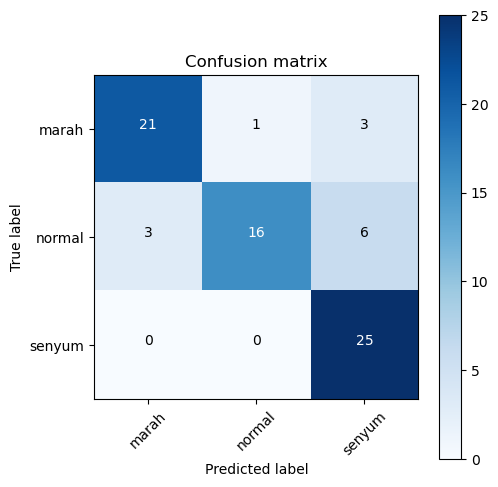

Hasil:
              precision    recall  f1-score   support

       marah       0.88      0.84      0.86        25
      normal       0.94      0.64      0.76        25
      senyum       0.74      1.00      0.85        25

    accuracy                           0.83        75
   macro avg       0.85      0.83      0.82        75
weighted avg       0.85      0.83      0.82        75



In [169]:
import tkinter as tk
import numpy as np
import os
from os import listdir
from PIL import Image
from os.path import isdir
from matplotlib import pyplot
from numpy import load
from numpy import savez_compressed
from numpy import asarray
from numpy import expand_dims


import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN


from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from keras.models import load_model
from keras.layers import Input

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import pickle



import cv2
# Load model
face_detector = MTCNN()
MyFaceNet = load_model('facenet_keras.h5')

# Global variables
testX = None
testy = None
model = None
labels = ['marah', 'normal', 'senyum']


def create_signature(directory):
    signatures = []

    for filename in listdir(directory):
        img_path = os.path.join(directory, filename)
        gbr1 = cv2.imread(img_path)

        wajah = face_detector.detect_faces(gbr1)

        if len(wajah) > 0:
            for face1 in wajah:
                x1, y1, width, height = face1['box']
                x1, y1 = abs(x1), abs(y1)
                x2, y2 = x1 + width, y1 + height

                # Extract facial landmarks
                facial_landmarks = face1['keypoints']
                left_eye = facial_landmarks['left_eye']
                right_eye = facial_landmarks['right_eye']
                nose = facial_landmarks['nose']
                mouth_left = facial_landmarks['mouth_left']
                mouth_right = facial_landmarks['mouth_right']

                # Draw facial landmarks on the image
                cv2.circle(gbr1, left_eye, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, right_eye, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, nose, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, mouth_left, 5, (0, 0, 255), -1)
                cv2.circle(gbr1, mouth_right, 5, (0, 0, 255), -1)

                # Crop and resize the face
                gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
                gbr = Image.fromarray(gbr)
                gbr_array = asarray(gbr)

                face = gbr_array[y1:y2, x1:x2]
                face = Image.fromarray(face)
                face = face.resize((160, 160))
                face = asarray(face)

                face = face.astype('float32')
                mean, std = face.mean(), face.std()
                face = (face - mean) / std

                face = expand_dims(face, axis=0)
                signature = MyFaceNet.predict(face)

                signatures.append(signature)

    return signatures


def load_dataset(directory):
    X, y = [], []

    for subdir in listdir(directory):
        path = os.path.join(directory, subdir)

        if not isdir(path):
            continue

        signatures = create_signature(path)
        labels = [subdir for _ in range(len(signatures))]

        X.extend(signatures)
        y.extend(labels)

    return asarray(X), asarray(y)


def load_test_data50():

    global testX
    global testy
    global test_y

    # Load test dataset
    testX, testy = load_dataset('testing25/')
    print(testX.shape, testy.shape)

    # Reshape the data
    testX = np.squeeze(testX, axis=1)

    # Encode labels
    encoder = LabelEncoder()
    encoder.fit(testy)
    encoded_Y = encoder.transform(testy)

    test_y = np_utils.to_categorical(encoded_Y)


def load_trained_model():
    global model
    model = keras.models.load_model('MODEL_BARU4.h5')


def klasifikasi(test_y):
    global model
    global testX
    global labels
    global y_pred

    # Predict all classes
    y_pred = model.predict(testX)

    # Get the actual/target class
    actual_class = test_y.argmax(axis=1)[0]
    print("Actual Class:", actual_class)



def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


def hasil():
    global test_y, y_pred, labels

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=labels, normalize=False, title='Confusion matrix')

    print('Hasil:')
    print(classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=labels))


# Create an instance of Tkinter
window = tk.Tk()
window.title("Pengujian menggunakan Confusion Matrix")


# Create buttons
def start_mulai():
    load_test_data50()
    load_trained_model()
    klasifikasi(test_y)


import_btn = tk.Button(window, text="Mulai", command=start_mulai)
import_btn.pack(pady=10)

klasifikasi_btn = tk.Button(window, text="Klasifikasi", command=lambda: klasifikasi(test_y))
klasifikasi_btn.pack(pady=10)

hasil_btn = tk.Button(window, text="Hasil Klasifikasi", command=hasil)
hasil_btn.pack(pady=10)

# Start the GUI
window.mainloop()
   


In [144]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

labels = ['marah', 'senyum', 'normal']

# Load model
modelSmile = load_model('MODEL_BARU3.h5')

# Prediksi semua kelas
y_pred = modelSmile.predict(testX)

# Mengambil kelas aktual/target
actual_class = test_y.argmax(axis=1)[0]

# Mengambil prediksi untuk contoh pertama
predicted_class = np.argmax(y_pred[0])

# Menghitung probabilitas prediksi untuk kelas pertama
predicted_prob = y_pred.max(axis=1)[0] * 100

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Menghitung matriks kebingungan
cnf_matrix = confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Menampilkan matriks kebingungan dalam bentuk plot
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=False,
                      title='Confusion matrix')

# Menampilkan laporan klasifikasi
print('Hasil:')
print(classification_report(test_y.argmax(axis=1), y_pred.argmax(axis=1), target_names=labels))


AttributeError: 'builtin_function_or_method' object has no attribute 'argmax'

In [164]:
from tensorflow import keras

# Muat model dari file .h5
model = keras.models.load_model('MODEL_BARU4.h5')


In [166]:
# Lakukan prediksi pada data uji
y_pred = model.predict(testX)


In [167]:
import numpy as np

# Konversi prediksi probabilitas menjadi label kelas
y_pred_labels = np.argmax(y_pred, axis=1)

# Deklarasikan label kelas yang sesuai
class_labels = ['marah', 'senyum', 'normal']

# Konversi prediksi menjadi label kelas konkret
y_pred_labels = [class_labels[label] for label in y_pred_labels]


In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Hitung matriks kebingungan
cm = confusion_matrix(y_true, y_pred_labels, labels=class_labels)

# Hitung metrik akurasi
accuracy = accuracy_score(y_true, y_pred_labels)

# Hitung metrik presisi untuk setiap kelas
precision = precision_score(y_true, y_pred_labels, average=None, labels=class_labels)

# Hitung metrik recall untuk setiap kelas
recall = recall_score(y_true, y_pred_labels, average=None, labels=class_labels)

# Hitung metrik F1-score untuk setiap kelas
f1 = f1_score(y_true, y_pred_labels, average=None, labels=class_labels)


NameError: name 'y_true' is not defined